# Let's run some experiments!

Here there are some nice plot of the results I've achieved with this **INCREDIBLY** dumb classifier.

You are wondering if I'm extracting features...?
The answer is **NOT AT ALL**. The images are quite all the same except from the caption.
So there are surely some pixels which can be considered important somehow.

I'm going to use a [RandomForest Classifier](https://en.wikipedia.org/wiki/Random_forest).

Here it goes a brief explanation on what a Random Forest is.

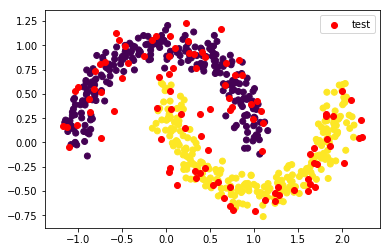

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons, load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

X_moons, y_moons = make_moons(n_samples=500, noise = 0.1)
X_tst, y_tst = make_moons(n_samples=100, noise = 0.15)
plt.scatter(X_moons[:,0],X_moons[:,1], c=y_moons)
plt.scatter(X_tst[:,0],X_tst[:,1], c='r', label='test')
plt.legend()

Observe the twin-moon dataset. It's a classic example of **non-linearity** in data.
There are bunch of methods for dealing with this kind of data (i.e. Kernels).
Each model needs to be regularized somehow, based on tuning parameters $\alpha, \gamma,$ ... 

What are the tuning parameters of Random Forest?
* The number of decision tree estimator in the forest
* the depth of each tree

Sounds very complicated. Let's tackle the first parameter.

In [39]:
errors = []
for i in range(1,50,1):
    forest = RandomForestClassifier(n_estimators=i)
    forest.fit(X_moons, y_moons)
    y_pred = forest.predict(X_tst)
    errors.append( np.sum(y_pred != y_tst) / len(y_tst)*100 )

Text(0,0.5,'Test error %')

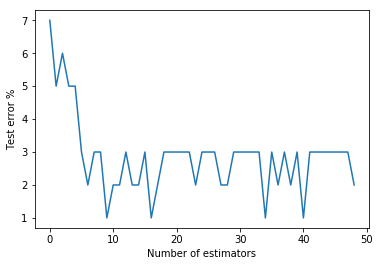

In [41]:
plt.plot(errors)
plt.xlabel('Number of estimators')
plt.ylabel('Test error %')

What's under the hood? Random forest creates $n$ decision trees and averages the results among them. If the samples chosen for the inner training are not correlated somwhow, then the cariance of the model is correctly reduced by the average of the solution.

More estimators means better results (of course depending on the variance of 

/home/luca/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


The shape of the problem is (1658, 40000)
And the error is ONLY 0.39 %!


Text(0,0.5,'Importance')

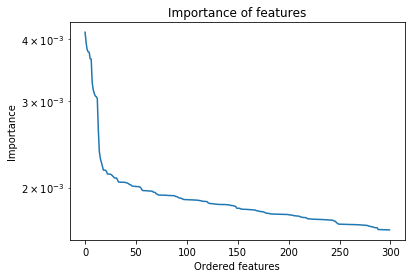

In [3]:
from data_generator import  train_test_split, generate_mapping, create_dataset
import numpy as np
import matplotlib.pyplot as plt

X_train, y_train, X_tst, y_tst = train_test_split(test_size=0.7, subsample=1, persistance=False)
print("The shape of the problem is {}".format(X_train.shape))

forest = RandomForestClassifier(n_estimators=15)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_tst)

error =  100*np.sum( y_pred != y_tst ) / len(y_tst)

print('And the error is ONLY {0:.2f} %!'.format(error))
result = np.sort(forest.feature_importances_)
result = result[::-1]
plt.semilogy(result[:300])
plt.title('Importance of features')
plt.xlabel('Ordered features')
plt.ylabel('Importance')


As you can barely see from the plot, there are some important features... but the order of magnitude is the same.
That classification took into account only a very very small portion of the dataset, but it's not so relevant. 

This data are just *well done* for the point of view of classification.
They have large portions of significant information, there are no translations or rotations.

**This is way it's very very simple to classify them!**

There is no need of Deep Learning at all (for this dataset).